## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')


# Display the data table for preview
combined_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#combined_mice_df.to_csv("dataframemice.csv", encoding='utf-8', index=False, header=True)

In [3]:
# Checking the number of mice.

k = combined_mice_df.value_counts('Mouse ID')
k.head()

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
dtype: int64

In [4]:
total_mice = combined_mice_df['Mouse ID'].count()
total_mice

1893

In [5]:
# Optional: Get all the data for the duplicate mouse 
duplicate= combined_mice_df.loc[combined_mice_df['Mouse ID'] == 'g989',:]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleandata = combined_mice_df[combined_mice_df['Mouse ID'] != 'g989']
cleandata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleandata['Mouse ID'].count()

1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary = cleandata.groupby('Drug Regimen')
                                  
sum_mean = pd.DataFrame(summary['Tumor Volume (mm3)'].mean())
                 
sum_mean_rename = sum_mean.rename(columns = {'Tumor Volume (mm3)':'Mean'})

sum_mean_rename



,Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [9]:
sum_median = pd.DataFrame(summary['Tumor Volume (mm3)'].median())

sum_median_rename = sum_median.rename(columns = {'Tumor Volume (mm3)':'Median'})

sum_median_rename

,Median
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [10]:
sum_variance = summary.var()
sum_variance

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919
Placebo,40.384837,3.378146,192.954266,61.168083,1.792449
Propriva,48.251655,2.933995,187.050699,43.852013,1.224306
Ramicane,35.362393,10.465318,203.796178,23.486704,0.477838
Stelasyn,63.036648,2.701473,191.620626,59.450562,0.944874


In [11]:
sum_var_loc = pd.DataFrame(sum_variance.iloc[:,3])

sum_var_rename = sum_var_loc.rename(columns = {'Tumor Volume (mm3)':'Variance'})

sum_var_rename

,Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [12]:
sum_std = summary.std()
sum_std


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,6.715855,1.499249,14.184814,8.134708,1.216519
Placebo,6.354907,1.837973,13.890798,7.821003,1.338824
Propriva,6.946341,1.712891,13.676648,6.622085,1.106484
Ramicane,5.946629,3.235014,14.275720,4.846308,0.691259
Stelasyn,7.939562,1.643616,13.842710,7.710419,0.972046


In [13]:
sum_std_loc = pd.DataFrame(sum_std.iloc[:,3])


sum_std_rename = sum_std_loc.rename(columns = {'Tumor Volume (mm3)':'Standard Deviation'})

sum_std_rename

,Standard Deviation
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [14]:
sum_sem = summary.sem()
sum_sem

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,0.509136,0.180169,0.948518,0.329346,0.055981
Ceftamin,0.604977,0.118535,1.070629,0.469821,0.088766
Infubinol,0.562919,0.163684,1.009879,0.492236,0.076985
Ketapril,0.439030,0.134333,1.023238,0.603860,0.101659
Naftisol,0.492430,0.109930,1.040081,0.596466,0.089200
Placebo,0.472356,0.136615,1.032495,0.581331,0.099514
Propriva,0.570986,0.140799,1.124214,0.544332,0.090952
Ramicane,0.393825,0.214244,0.945433,0.320955,0.045780
Stelasyn,0.590143,0.122169,1.028921,0.573111,0.072252


In [15]:
sum_sem_loc = pd.DataFrame(sum_sem.iloc[:,3])


sum_sem_rename = sum_sem_loc.rename(columns = {'Tumor Volume (mm3)':'SEM'})

sum_sem_rename

,SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

merge_mean = pd.merge(sum_mean_rename, sum_median_rename, left_on=['Drug Regimen'], right_on = ['Drug Regimen'],how = "outer")

merge_median = pd.merge(merge_mean, sum_var_rename, left_on=['Drug Regimen'], right_on = ['Drug Regimen'],how = "outer")

merge_var = pd.merge(merge_median, sum_std_rename, left_on=['Drug Regimen'], right_on = ['Drug Regimen'],how = "outer")

merge_std = pd.merge(merge_var, sum_sem_rename, left_on=['Drug Regimen'], right_on = ['Drug Regimen'],how = "outer")

merge_std


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

    


In [18]:
#summary = cleandata.groupby('Drug Regimen')
                                  
sum_count = summary.count()
                 
sum_count

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [19]:
summary_count= sum_count.iloc[:,0]
summary_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<AxesSubplot:xlabel='Drug Regimen'>

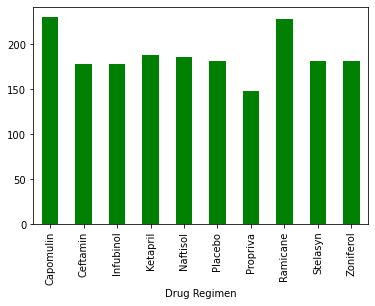

In [20]:
summary_count.plot(kind="bar", facecolor="green")

In [21]:
import matplotlib.pyplot as plt

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_names = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
measurements = summary_count
x_axis = np.arange(len(drug_names))

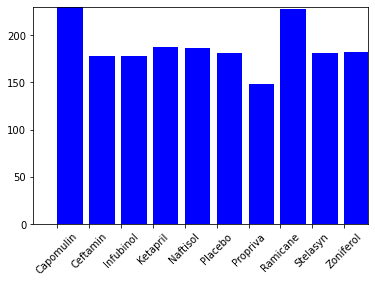

In [23]:
plt.bar(x_axis,measurements, color="b", align="edge")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names, rotation=45)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(measurements)+0.4)

plt.show()

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#malefemale_sum = cleandata

#malefemale_id = cleandata.groupby('Mouse ID')
#malefemale_sum = malefemale_id.count()

malefemale_sum = cleandata.drop_duplicates(subset='Mouse ID')

Final_data = malefemale_sum["Sex"].value_counts()

Final_data


Male      125
Female    123
Name: Sex, dtype: int64

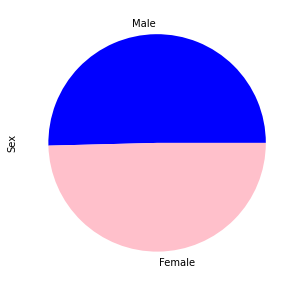

In [25]:

#Final_data.plot(kind="pie", figsize=(5,5))
color1= ["blue", "pink"]
Final_data.plot(kind="pie", colors=color1, figsize=(5,5))

plt.show()


In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



In [27]:
pies = ["Male","Female"]
pie_malefemale = Final_data
colors = ["green","lightblue"]
explode = (0.1,0)

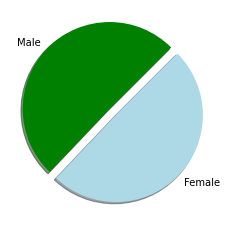

In [28]:
plt.pie(pie_malefemale, explode=explode, labels=pies, colors=colors,
        shadow=True, startangle=45)

plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [30]:
sorteddata= cleandata.groupby('Mouse ID')
sorteddata.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
finaltumorvolume = sorteddata['Timepoint'].max()
finaltumorvolume.head()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [32]:
finaltumorvolume = finaltumorvolume.reset_index()

In [33]:
merge_left = pd.merge(finaltumorvolume, cleandata, left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'],how = "left")

merge_left


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [34]:
set_Capomulin= merge_left[merge_left['Drug Regimen']=='Capomulin']


In [35]:
set_Ramicane= merge_left[merge_left['Drug Regimen']=='Ramicane']
set_Ramicane

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
10,a520,45,Ramicane,Male,13,21,38.810366,1
12,a644,45,Ramicane,Female,7,17,32.978522,1
33,c458,30,Ramicane,Female,23,20,38.342008,2
37,c758,45,Ramicane,Male,9,17,33.397653,1
45,d251,45,Ramicane,Female,8,19,37.311236,2
52,e662,45,Ramicane,Male,8,24,40.659006,2
70,g791,45,Ramicane,Male,11,16,29.128472,1
76,i177,45,Ramicane,Male,10,18,33.562402,3


In [36]:
set_Infubinol= merge_left[merge_left['Drug Regimen']=='Infubinol']


In [37]:
set_Ceftamin= merge_left[merge_left['Drug Regimen']=='Ceftamin']

In [38]:
List_of_Drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

List_of_Drugs 

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [39]:
FinalAnswer = merge_left[merge_left['Drug Regimen'].isin(List_of_Drugs)]

FinalAnswer

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [40]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [41]:
Final_list = FinalAnswer['Tumor Volume (mm3)']
Final_list

0      67.973419
1      65.525743
3      62.999356
6      38.407618
7      43.047543
         ...    
238    68.594745
239    31.896238
240    64.729837
244    30.638696
245    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [42]:
quartiles_final = Final_list.quantile([.25,.5,.75])
lowerq_final = quartiles_final[0.25]
upperq_final = quartiles_final[0.75]
iqr_final = upperq_final-lowerq_final



In [43]:
lower_bound_final = lowerq_final - (1.5*iqr_final)
upper_bound_final = upperq_final + (1.5*iqr_final)

In [44]:
lowerq_final

37.187743802499995

In [45]:
upperq_final

59.930261755000004

In [46]:
iqr_final

22.74251795250001

In [47]:
List_Capomulin = set_Capomulin['Tumor Volume (mm3)']

In [48]:
List_Ramicane = set_Ramicane['Tumor Volume (mm3)']

In [49]:
List_Infubinol = set_Infubinol['Tumor Volume (mm3)']

In [50]:
List_Ceftamin = set_Ceftamin['Tumor Volume (mm3)']

In [51]:
#ListTreatment = FinalAnswer.loc[:,['Mouse ID','Drug Regimen']]
#ListTreatment

In [52]:
#SeriesA = FinalAnswer.loc[:,'Tumor Volume (mm3)']
#SeriesA

In [53]:
#SeriesA = FinalAnswer['Tumor Volume (mm3)']
#SeriesA.sort_values()

#ListA = SeriesA.tolist()
#ListA

In [54]:
#ListA.to_csv('ListA.csv', encoding='utf-8', index=False)


In [55]:
#SortedList = ListA.sort(key=None, reverse=False)

#print (SortedList)

In [56]:
#Series_A = pd.Series(SortedList)

In [57]:
quartiles_mulin = List_Capomulin.quantile([.25,.5,.75])
lowerq_mulin = quartiles_mulin[0.25]
upperq_mulin = quartiles_mulin[0.75]
iqr_mulin = upperq_mulin-lowerq_mulin



In [58]:
lowerq_mulin

32.37735684

In [59]:
upperq_mulin

40.1592203

In [60]:
lower_bound_mulin = lowerq_mulin - (1.5*iqr_mulin)
upper_bound_mulin = upperq_mulin + (1.5*iqr_mulin)

In [61]:
lower_bound_mulin

20.70456164999999

In [62]:
upper_bound_mulin

51.83201549

In [63]:
list_mulin=[]

In [64]:
for row in List_Capomulin:
    if row <lower_bound_mulin:
        list_mulin= list_mulin.append(row)
    elif row>upper_bound_mulin:
        list_mulin= list_mulin.append(row)
list_mulin

[]

In [65]:
quartiles_ram = List_Ramicane.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram
iqr_ram

9.098536719999998

In [66]:
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

In [67]:
list_ram=[]

In [68]:
for row in List_Ramicane:
    if row <lower_bound_ram:
        list_ram= list_ram.append(row)
    elif row>upper_bound_ram:
        list_ram= list_ram.append(row)
list_ram

[]

In [69]:
quartiles_Inf = List_Infubinol.quantile([.25,.5,.75])
lowerq_Inf = quartiles_Inf[0.25]
upperq_Inf = quartiles_Inf[0.75]
iqr_Inf = upperq_Inf-lowerq_Inf
iqr_Inf

11.477135160000003

In [70]:
lower_bound_Inf = lowerq_Inf - (1.5*iqr_Inf)
upper_bound_Inf = upperq_Inf + (1.5*iqr_Inf)

In [71]:
list_Inf=[]

In [72]:
for row in List_Infubinol:
    if row < lower_bound_Inf:
        list_Inf= list_Inf.append(row)
    elif row > upper_bound_Inf:
        list_Inf= list_Inf.append(row)
list_Inf

In [73]:
quartiles_Ceft = List_Ceftamin.quantile([.25,.5,.75])
lowerq_Ceft = quartiles_Ceft[0.25]
upperq_Ceft = quartiles_Ceft[0.75]
iqr_Ceft = upperq_Ceft-lowerq_Ceft
iqr_Ceft

15.577752179999997

In [74]:
lower_bound_Ceft = lowerq_Ceft - (1.5*iqr_Ceft)
upper_bound_Ceft = upperq_Ceft + (1.5*iqr_Ceft)

In [75]:
list_Ceft=[]

In [76]:
for row in List_Ceftamin:
    if row < lower_bound_Ceft:
        list_Ceft= list_Ceft.append(row)
    elif row > upper_bound_Ceft:
        list_Ceft= list_Ceft.append(row)
list_Ceft

[]

In [77]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


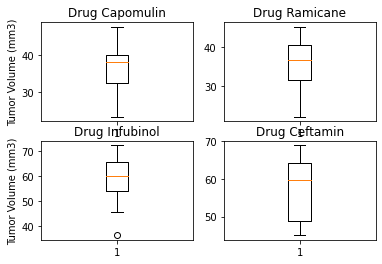

In [78]:

fig1, ax = plt.subplots(2,2)
ax[0,0].set_title('Drug Capomulin')
ax[0,0].set_ylabel('Tumor Volume (mm3)')
ax[0,0].boxplot(List_Capomulin)
ax[0,1].set_title('Drug Ramicane')

ax[0,1].boxplot(List_Ramicane)
ax[1,0].set_title('Drug Infubinol')
ax[1,0].set_ylabel('Tumor Volume (mm3)')
ax[1,0].boxplot(List_Infubinol)
ax[1,1].set_title('Drug Ceftamin')

ax[1,1].boxplot(List_Ceftamin)


plt.show()

## Line and Scatter Plots

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [80]:
tumorvspoint= cleandata[cleandata['Mouse ID'] == 'b128']
tumorvspoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [81]:
tumorvspointVolume = tumorvspoint['Tumor Volume (mm3)']
tumorvspointVolume

300    45.000000
301    45.651331
302    43.270852
303    43.784893
304    42.731552
305    43.262145
306    40.605335
307    37.967644
308    38.379726
309    38.982878
Name: Tumor Volume (mm3), dtype: float64

In [82]:
tumorvspointTimepoint = tumorvspoint['Timepoint']
tumorvspointTimepoint

300     0
301     5
302    10
303    15
304    20
305    25
306    30
307    35
308    40
309    45
Name: Timepoint, dtype: int64

In [83]:
from scipy.stats import linregress


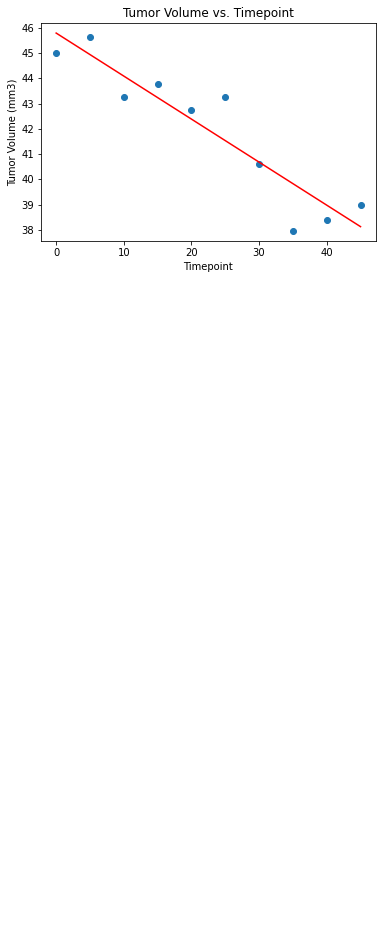

In [84]:
x_values = tumorvspointTimepoint
y_values = tumorvspointVolume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

plt.title("Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [85]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen




In [86]:
select_mulin= pd.DataFrame(cleandata[cleandata['Drug Regimen'] == 'Capomulin'])

#sort_weight.head()


select_mulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [87]:
sort_weight = select_mulin[['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
sort_weight

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [88]:
sort_mulin= sort_weight.groupby(['Mouse ID'])
sort_mulin.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
435,i557,24,43.967895
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [89]:
sum_mean_mulin = pd.DataFrame(sort_mulin['Tumor Volume (mm3)'].mean())
sum_mean_mulin

,Tumor Volume (mm3)
Mouse ID,
b128,41.963636
b742,40.083699
f966,36.505973
g288,41.990097
g316,44.613344
i557,44.805810
i738,39.141053
j119,44.465236
j246,43.216925


In [90]:
select_columns = sort_weight[['Mouse ID','Weight (g)']]
select_columns.head(100)

,Mouse ID,Weight (g)
10,s185,17
11,s185,17
12,s185,17
13,s185,17
14,s185,17
...,...,...
215,w914,21
216,w914,21
217,w914,21
218,w914,21


In [91]:
merge_volume = pd.merge(sum_mean_mulin, select_columns, left_on=['Mouse ID'], right_on = ['Mouse ID'],how = "inner")
merge_volume

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b128,41.963636,22
2,b128,41.963636,22
3,b128,41.963636,22
4,b128,41.963636,22
...,...,...,...
225,y793,38.506829,17
226,y793,38.506829,17
227,y793,38.506829,17
228,y793,38.506829,17


In [92]:
mergeunique= merge_volume.drop_duplicates(subset=['Mouse ID'])



In [93]:
mergeunique

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
10,b742,40.083699,21
20,f966,36.505973,17
25,g288,41.990097,19
35,g316,44.613344,22
45,i557,44.805810,24
55,i738,39.141053,20
65,j119,44.465236,23
75,j246,43.216925,21
83,l509,44.434474,21


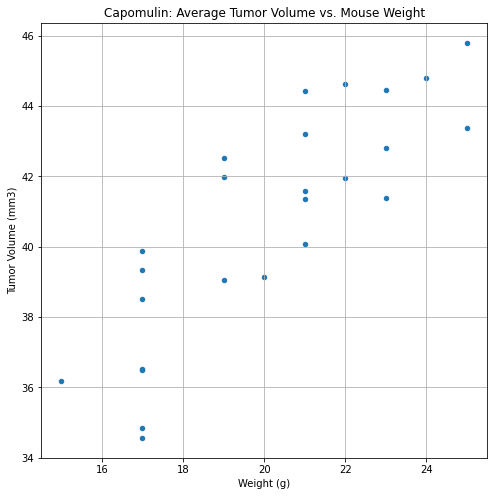

In [94]:
mergeunique.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin: Average Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

In [95]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [96]:
mergeunique_corr = mergeunique.corr()
mergeunique_corr.unstack().sort_values()

Tumor Volume (mm3)  Weight (g)            0.841936
Weight (g)          Tumor Volume (mm3)    0.841936
Tumor Volume (mm3)  Tumor Volume (mm3)    1.000000
Weight (g)          Weight (g)            1.000000
dtype: float64

y = 0.95x + 21.55


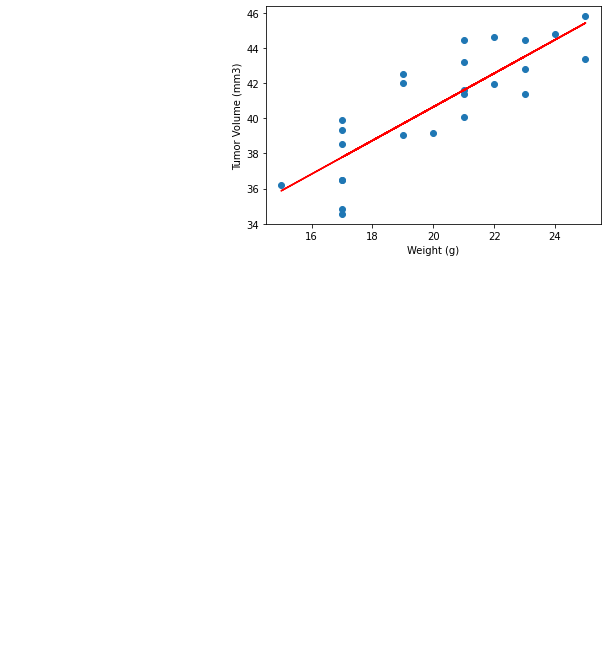

In [97]:
x_values = mergeunique['Weight (g)']
y_values = mergeunique['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
#print(f"The r-squared is: {rvalue**2}")
plt.show()